# Notebook for generating analysis and panels in Figure 3

In [14]:
%pylab
%matplotlib inline
%reload_ext autoreload


if sys.platform != 'darwin':
    os.environ["R_HOME"] = r"C:\\Program Files\\R\\R-3.6.0" # change as needed
%load_ext rpy2.ipython
import pandas as pd
import sys
#import seaborn as sns
sys.path.append('../../src')
import abrTools as at
import os
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from collections import Counter
import pretty_confusion_matrix as pcm
from scipy.signal import savgol_filter
import figureTools as ft

fs = 195000.0/2.0 # Acquisition sampling rate

from datetime import date
savefolder = os.path.join('../..','results',str(date.today()))

from matplotlib.pyplot import errorbar
rcParams["font.family"] = "Arial"
rcParams['axes.linewidth'] = 5
rcParams["xtick.major.size"] = 20
rcParams["xtick.major.width"] = 5
rcParams["xtick.major.pad"] = 10

rcParams["ytick.major.size"] = 20
rcParams["ytick.major.width"] = 5
rcParams["xtick.minor.size"] = 10
rcParams["xtick.minor.width"] = 5

rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
markersize=35*1.3
fontSize = 54*1.5
import matplotlib.gridspec as gridspec

#Point to the results (from 6NVsRepaired-TrainAllModels_2ndSubmission.ipynb) that need to be used
resultFolder =  '../../results/2024-10-25-main-optimisedForF1Score'# '../../results/2024-03-15-main'#'../../results/2024-10-24-main-optimisedForRecall'#

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
X_train,  X_test,y_train,y_test,dataVersion = at.createClassificationDataset(datafolder='../../data',test_size=0.25,oversample=False,ages=[1,])
X = np.vstack([X_train,X_test])
y = np.hstack([y_train,y_test])

The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})


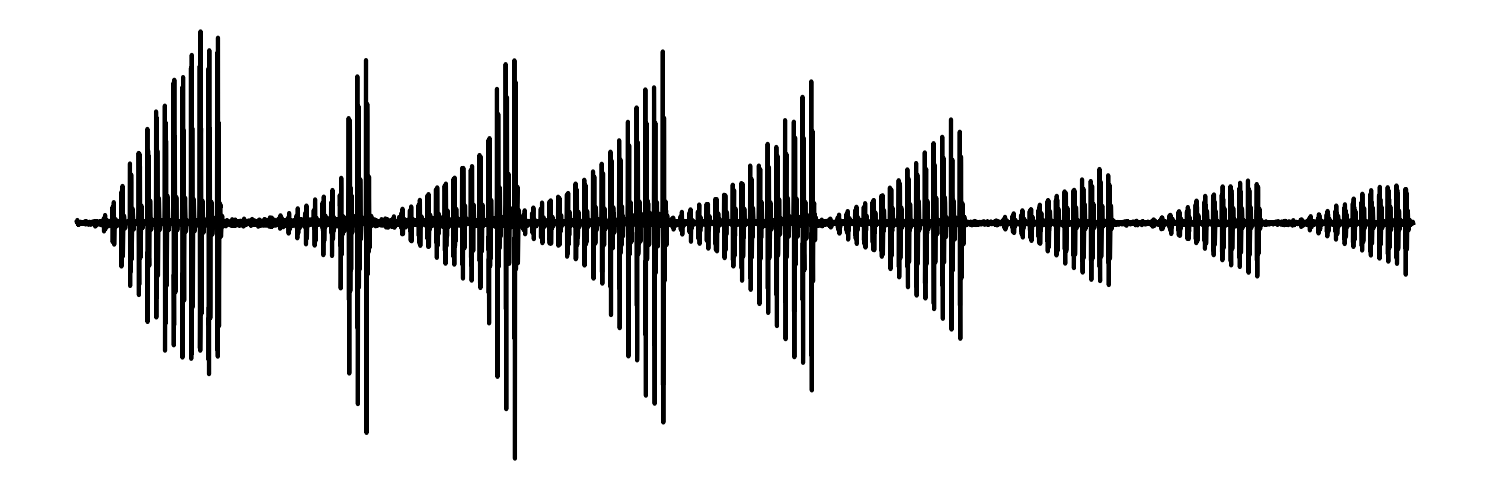

In [3]:
fig = figure(figsize(15,5))
ax = subplot(111)
ax.plot(X.mean(0)[::20],'k',linewidth=3)
ax.set_axis_off()
tight_layout()
savefig('./Panels/sampletrace.pdf',dpi=1200,transparent=True)

Collect all results from the result folder, keep only the one for the "Global" model for this figure

In [4]:
master = at.collectResults(resultFolder)

master['accuracy'] = master['accuracy']*100
master['test_precision_scorer_avg'] = master['test_precision_scorer_avg']*100
master['test_recall_scorer_avg'] = master['test_recall_scorer_avg']*100
master['roc_auc_score'] = master['roc_auc_score']*100
master['test_precision_scorer_6N'] = master['test_precision_scorer_6N']*100
master['test_recall_scorer_6N'] = master['test_recall_scorer_6N']*100
master['test_f1_scorer_6N'] = master['test_f1_scorer_6N']*100

master['test_precision_scorer_Rep'] = master['test_precision_scorer_Rep']*100
master['test_recall_scorer_Rep'] = master['test_recall_scorer_Rep']*100
master['test_f1_scorer_Rep'] = master['test_f1_scorer_Rep']*100


array(['HiveCote Anova FS', 'MLP Anova FS', 'Random Forest Anova FS',
       'Rocket Anova FS', 'SVC Anova FS', 'XGBOOST Anova FS'],
      dtype=object)
master.loc[master['Model']=='HiveCote Anova FS','Model'] = 'HC'
master.loc[master['Model']=='MLP Anova FS','Model'] = 'MLP'
master.loc[master['Model']=='SVC Anova FS','Model'] = 'SVM'
master.loc[master['Model']=='Random Forest Anova FS','Model'] = 'RF'
master.loc[master['Model']=='Rocket Anova FS','Model'] = 'Rckt'
master.loc[master['Model']=='XGBOOST Anova FS','Model'] = 'XGB'

In [5]:
df = master.query("Frequency=='Global'")
df.drop(['p_value','Frequency'],axis=1,inplace=True)
df.groupby('Model').agg([mean,std]).to_csv('Global_cv_averagescores.csv')

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_95371/2153104162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['p_value','Frequency'],axis=1,inplace=True)
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_95371/2153104162.py:3: FutureWarning: The provided callable <function mean at 0x1181896c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Model').agg([mean,std]).to_csv('Global_cv_averagescores.csv')
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_95371/2153104162.py:3: FutureWarning: The provided callable <function std at 0x1181897e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided cal

In [7]:
df.groupby('Model').agg([mean,std])

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_95371/3166644133.py:1: FutureWarning: The provided callable <function mean at 0x1181896c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Model').agg([mean,std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_95371/3166644133.py:1: FutureWarning: The provided callable <function std at 0x1181897e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('Model').agg([mean,std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_95371/3166644133.py:1: FutureWarning: The provided callable <function mean at 0x1181896c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current be

accuracy            test_f1_scorer_avg           test_f1_scorer_6N  \
            mean        std               mean       std              mean   
Model                                                                        
HC     86.369048  10.486976           0.863220  0.106608         84.841929   
MLP    84.218254  10.252186           0.842873  0.102465         82.352015   
RF     80.916667  10.045097           0.809557  0.100590         78.774163   
Rckt   86.781746   8.447809           0.866635  0.087082         85.556238   
SVM    84.845238  10.403757           0.846312  0.107446         84.348905   
XGB    79.130952  10.680816           0.791132  0.106798         76.711411   

                 test_f1_scorer_Rep            roc_auc_score             ...  \
             std               mean        std          mean        std  ...   
Model                                                                    ...   
HC     12.078879          87.617023   9.820708     91.951389   9.857183  ...   
MLP    12.145662          85.938672   9.050069     93.897817   7.136839  ...   
RF     11.187444          82.853143   9.535613     89.610615   8.632535  ...   
Rckt    9.399305          87.634142   8.495367     86.781746   8.447809  ...   
SVM    10.288923          84.840955  11.557974     93.677579   8.406875  ...   
XGB    12.223863          81.198486   9.912881     88.016865  10.596739  ...   

      test_precision_scorer_6N            test_precision_scorer_Rep  \
                          mean        std                      mean   
Model                                                                 
HC                   89.376190  12.819618                 86.350794   
MLP                  88.177778  13.248675                 83.194339   
RF                   84.812698  13.597585                 80.162626   
Rckt                 88.304762  10.837030                 87.834632   
SVM                  84.347619  13.688056                 87.194805   
XGB                  82.787302  13.977074                 79.330303   

                 test_recall_scorer_avg            test_recall_scorer_6N  \
             std                   mean        std                  mean   
Model                                                                      
HC     11.584037              86.550000  10.396870             82.571429   
MLP    10.045103              84.516667  10.012059             78.714286   
RF     10.517935              81.200000   9.951648             75.000000   
Rckt   10.137055              86.850000   8.486509             84.785714   
SVM    10.734818              84.783333  10.538949             85.857143   
XGB    12.585477              79.450000  10.545536             73.428571   

                 test_recall_scorer_Rep             
             std                   mean        std  
Model                                               
HC     15.907564              90.166667  12.363712  
MLP    14.697560              89.722222  11.530009  
RF     14.022880              86.833333  12.692195  
Rckt   13.794763              88.777778  11.798200  
SVM    11.955843              83.833333  15.449789  
XGB    16.730215              84.833333  13.423451  

[6 rows x 22 columns]

Friedman test statistic: 26.282051282051256, p-value: 7.86695587610001e-05
Significant differences found, performing Nemenyi post-hoc test...
Nemenyi post-hoc p-values:
            HC       MLP        RF      Rckt       SVM       XGB
HC    1.000000  0.788587  0.278575  0.900000  0.900000  0.223900
MLP   0.788587  1.000000  0.900000  0.504794  0.318876  0.900000
RF    0.278575  0.900000  1.000000  0.095118  0.042082  0.900000
Rckt  0.900000  0.504794  0.095118  1.000000  0.900000  0.071258
SVM   0.900000  0.318876  0.042082  0.900000  1.000000  0.030060
XGB   0.223900  0.900000  0.900000  0.071258  0.030060  1.000000


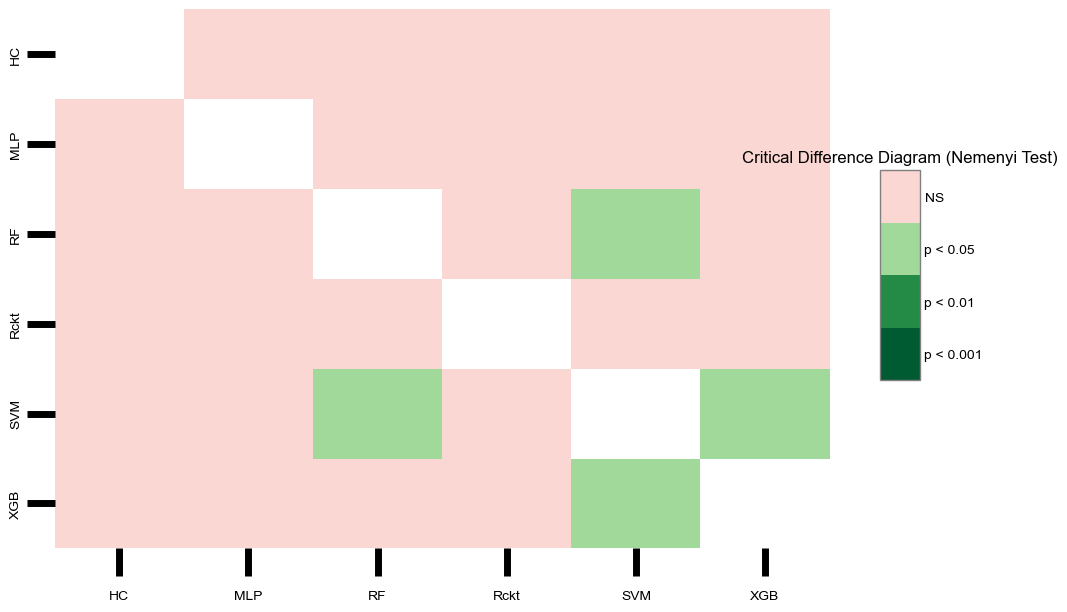

In [11]:
# Statistics using friedman test followed by Nemenyi posthoc 

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
metric ='test_recall_scorer_6N' #

# Example data: model performances across cross-validation folds
# Rows: cross-validation folds
# Columns: models

# For example, model accuracies across 10 cross-validation folds for 6 models
data1 = df[[metric,'Model']].pivot(columns='Model',values=metric)
data = data1.values


# Perform Friedman test
stat, p_value = friedmanchisquare(*data.T)  # Use .T to transpose for the correct shape
print(f'Friedman test statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
    print("Significant differences found, performing Nemenyi post-hoc test...")

    # Perform Nemenyi post-hoc test
    nemenyi_result = sp.posthoc_nemenyi_friedman(data1)

    # Display the pairwise p-values from the Nemenyi test
    print("Nemenyi post-hoc p-values:")
    print(nemenyi_result)

    # Optional: Plot a heatmap of the pairwise p-values
    labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
    plt.figure(figsize=(10, 7))
    sp.sign_plot(nemenyi_result, labels=True)
    plt.title("Critical Difference Diagram (Nemenyi Test)")
    plt.show()
else:
    print("No significant differences found among models.")

In [13]:
df2 = df.groupby('Model').mean()[['test_recall_scorer_6N','test_precision_scorer_6N','test_recall_scorer_Rep','roc_auc_score']]
df2['Model']=df2.index
df2

,test_recall_scorer_6N,test_precision_scorer_6N,test_recall_scorer_Rep,roc_auc_score,Model
Model,,,,,
HC,82.571429,89.376190,90.166667,91.951389,HC
MLP,78.714286,88.177778,89.722222,93.897817,MLP
RF,75.000000,84.812698,86.833333,89.610615,RF
Rckt,84.785714,88.304762,88.777778,86.781746,Rckt
SVM,85.857143,84.347619,83.833333,93.677579,SVM
XGB,73.428571,82.787302,84.833333,88.016865,XGB


/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])


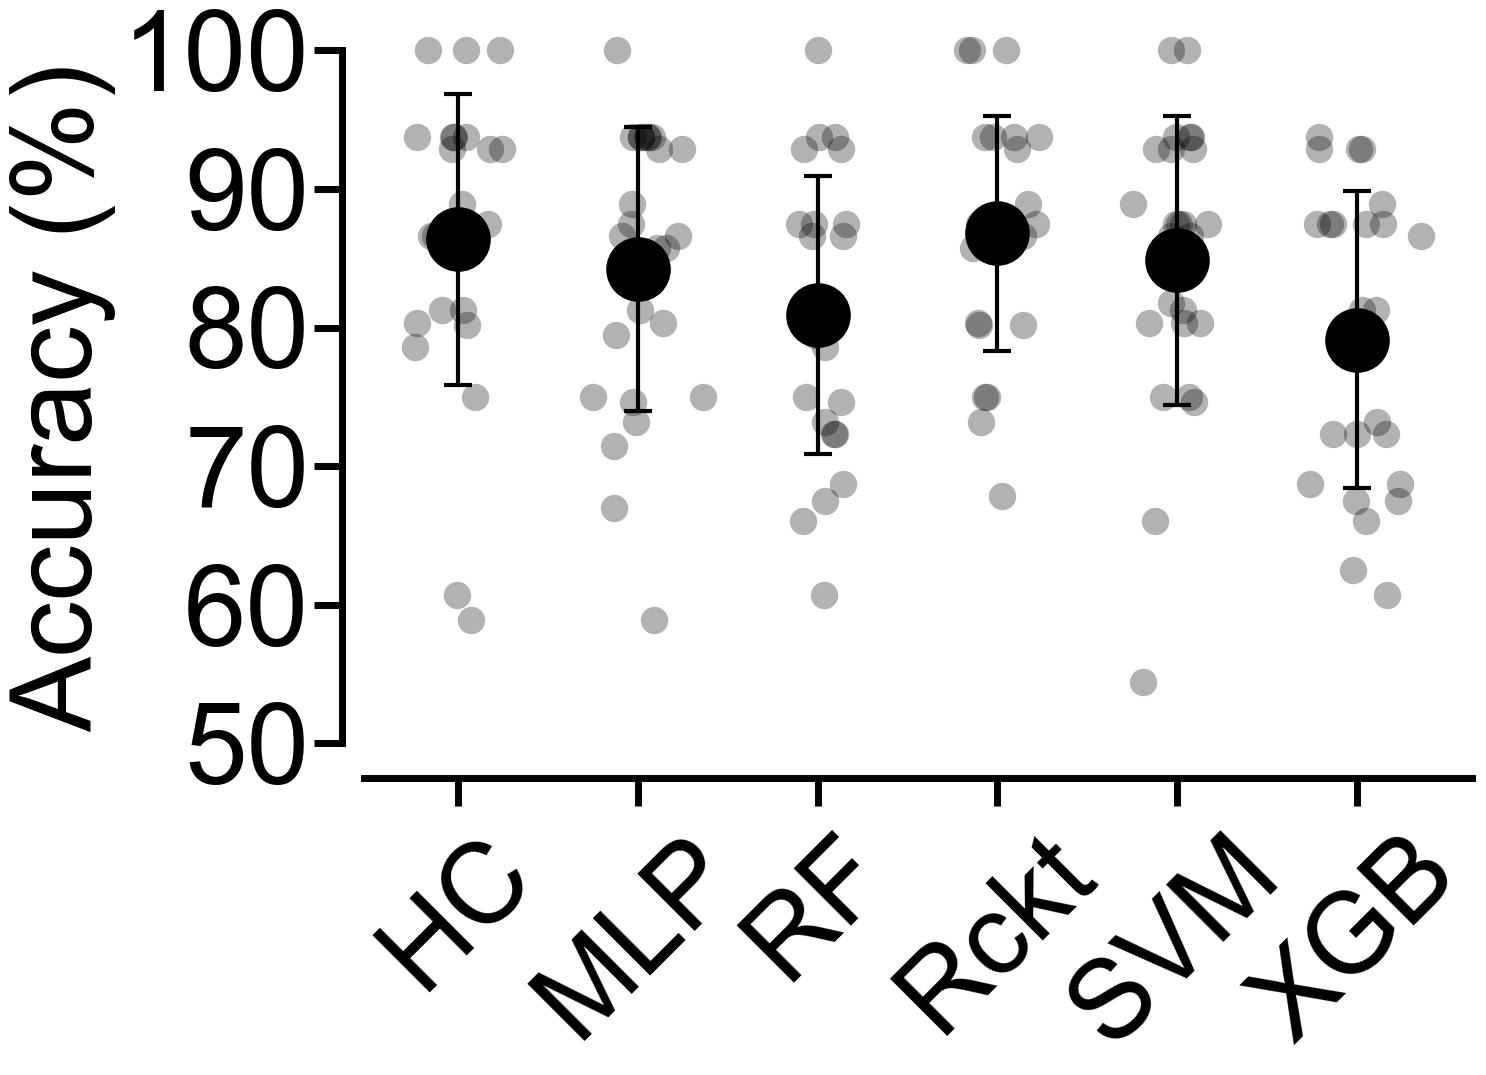

In [15]:
df = master[master['Frequency']=='Global']
ax,le= ft.makeMetricFigure(df,ylabel='Accuracy (%)',fontSize=fontSize)
ax.set_ylim(50,100)

savefig('./Panels/accuracy.pdf',transparent=True,dpi=1200)


/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])


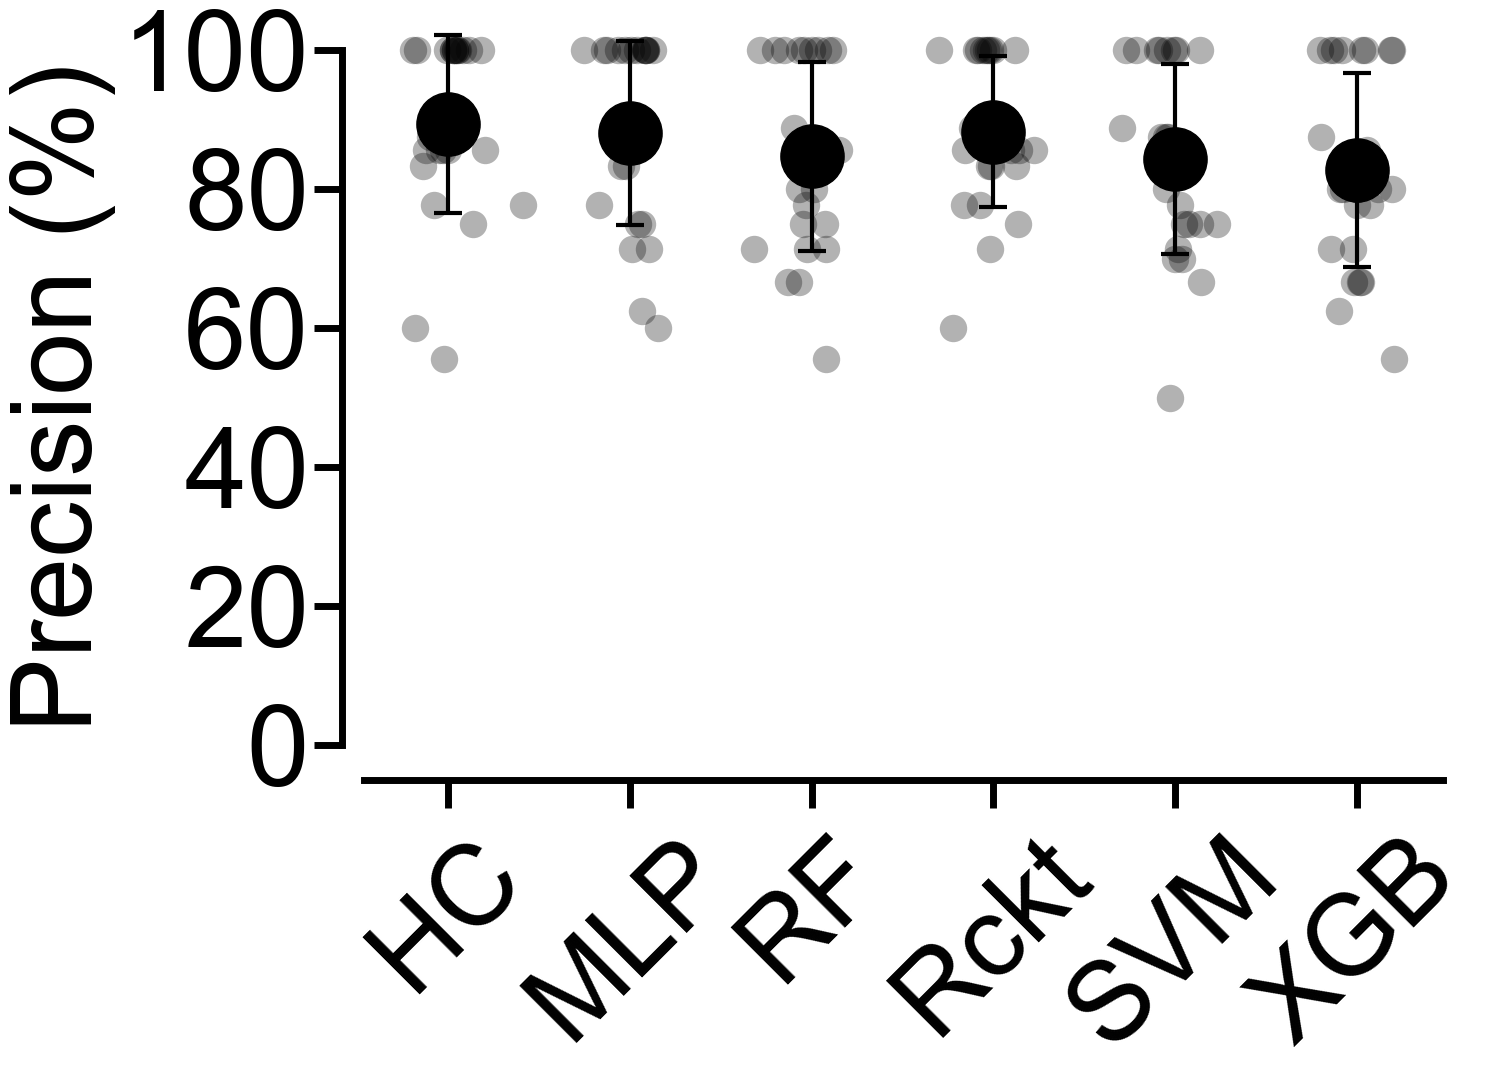

In [16]:
df = master[master['Frequency']=='Global']
ax,le = ft.makeMetricFigure(df,'test_precision_scorer_6N',le=le,ylabel='Precision (%)',fontSize=fontSize)

ax.set_ylim(0,100)
#ax.set_ylabel('Precision (%)',fontsize=fontSize*0.87)
savefig('./Panels/precision.pdf',transparent=True,dpi=1200)


/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])


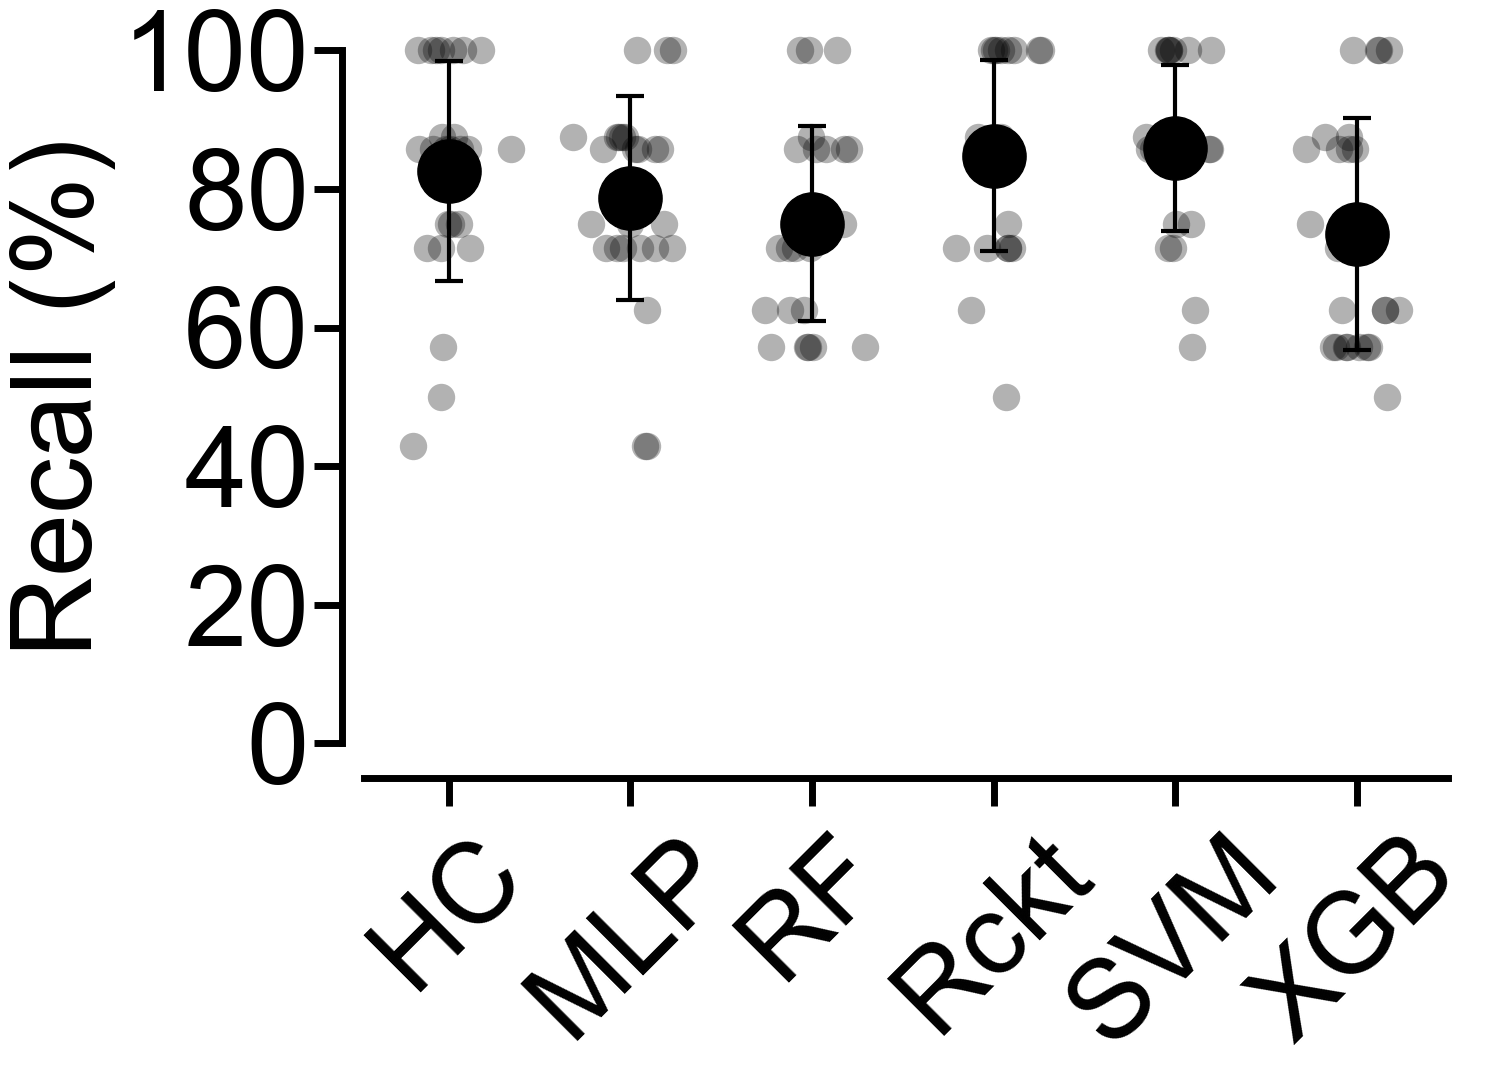

In [17]:
df = master[master['Frequency']=='Global']
ax,le = ft.makeMetricFigure(df,'test_recall_scorer_6N',le=le,ylabel='Recall (%)',fontSize=fontSize)

ax.set_ylim(0,100)
savefig('./Panels/recall.pdf',transparent=True,dpi=1200)

/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])


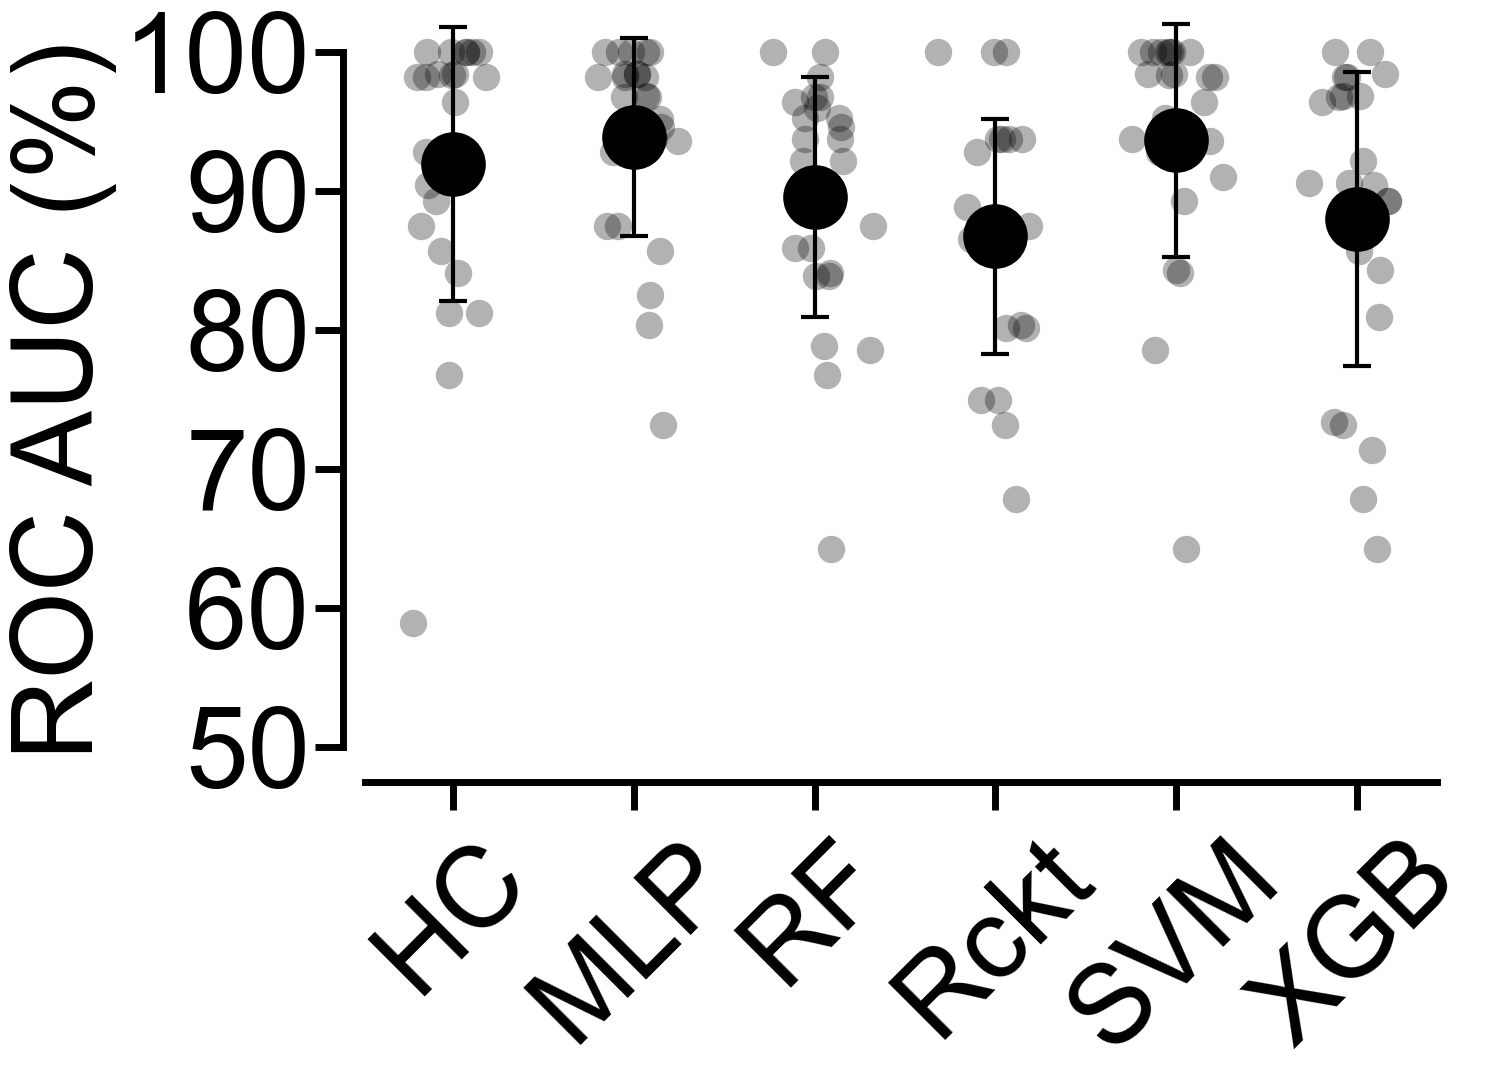

In [18]:
df = master[master['Frequency']=='Global']
ax,le = ft.makeMetricFigure(df,'roc_auc_score',le=le,ylabel = 'ROC AUC (%)',fontSize=fontSize)
ax.set_ylim(50,100)
savefig('./Panels/rocauc.pdf',transparent=True,dpi=1200)

/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])


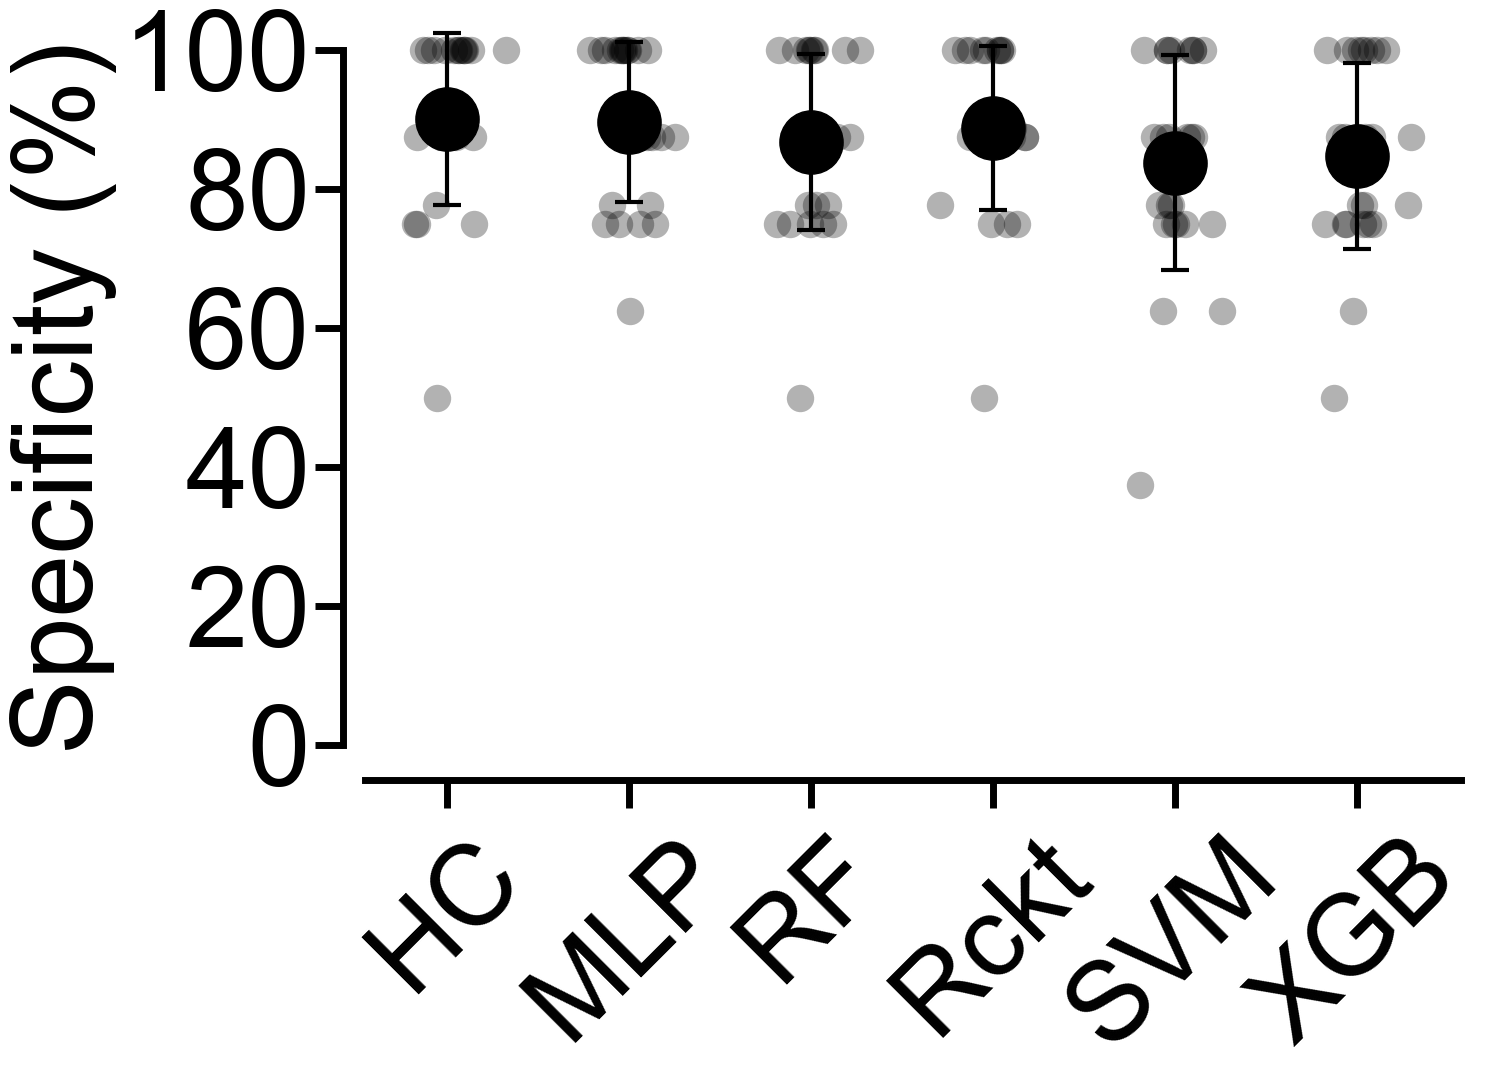

In [19]:
df = master[master['Frequency']=='Global']
ax,le = ft.makeMetricFigure(df,'test_recall_scorer_Rep',le=le,ylabel = 'Specificity (%)',fontSize=fontSize)
ax.set_ylim(0,100)
savefig('./Panels/specificity.pdf',transparent=True,dpi=1200)

/Users/federico/Desktop/ABR-ML 2/ABR-ML-analysis/notebooks/Paper/figureTools.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model idx'] = le.transform(df['Model'])


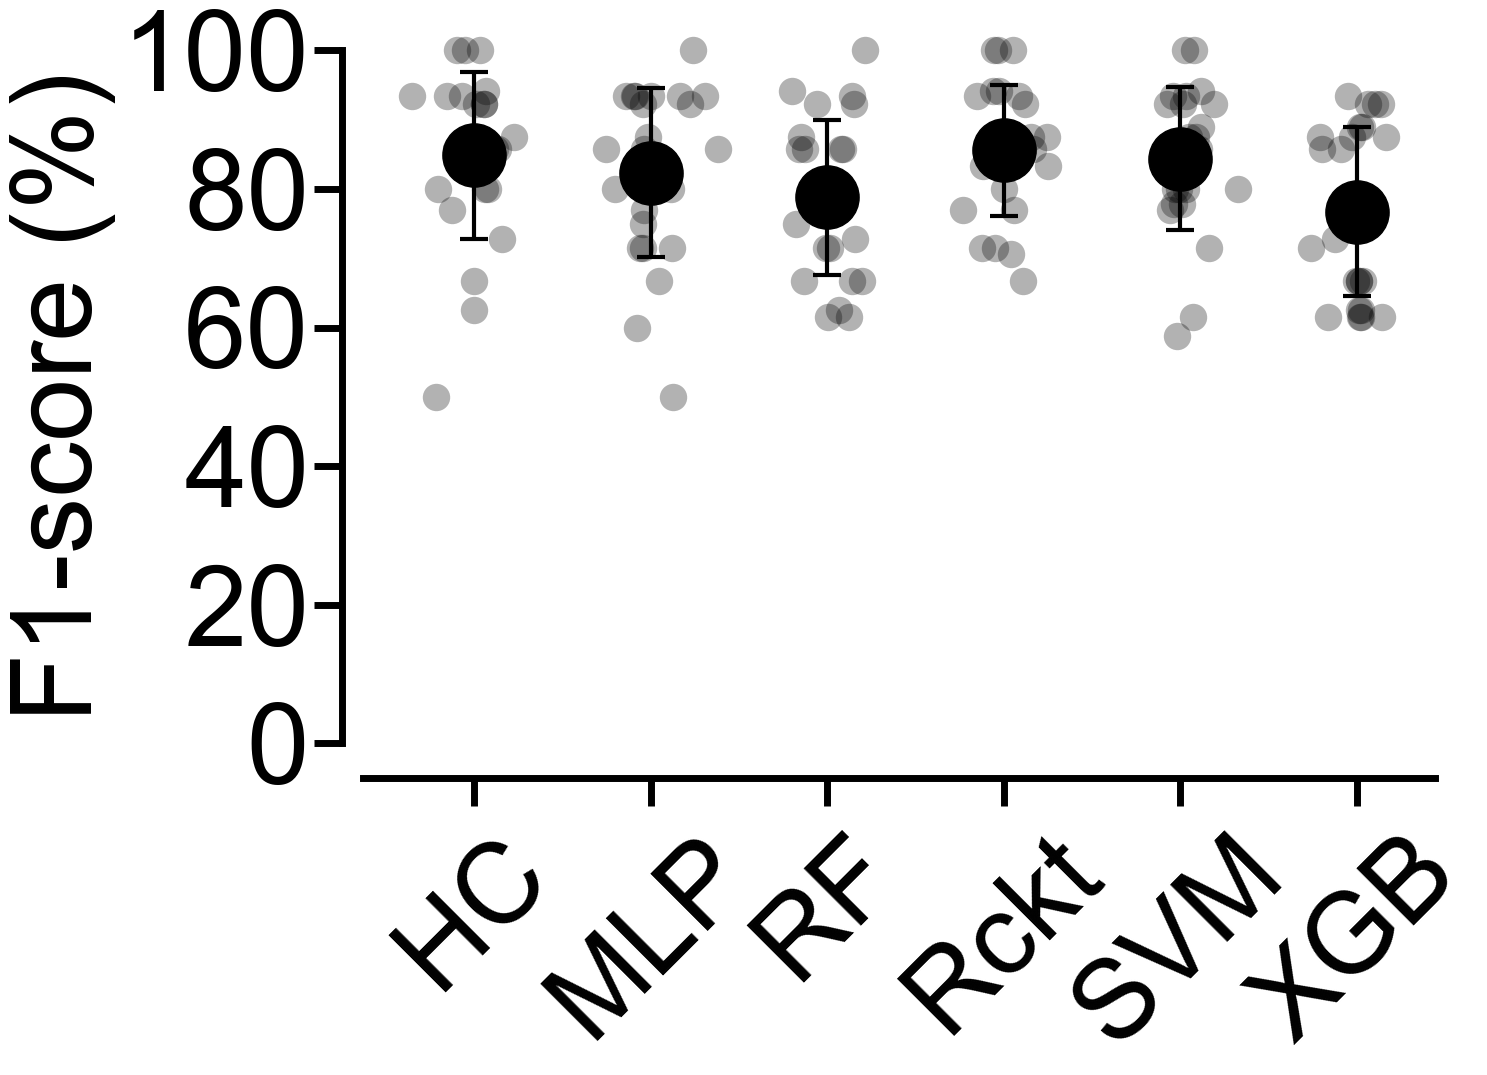

In [20]:
df = master[master['Frequency']=='Global']
ax,le = ft.makeMetricFigure(df,'test_f1_scorer_6N',le=le,ylabel = 'F1-score (%)',fontSize=fontSize)
ax.set_ylim(0,100)
savefig('./Panels/f1-score.pdf',transparent=True,dpi=1200)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.hybrid import HIVECOTEV2
from sklearn.feature_selection import f_classif,mutual_info_classif, SelectFpr, SelectPercentile
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier


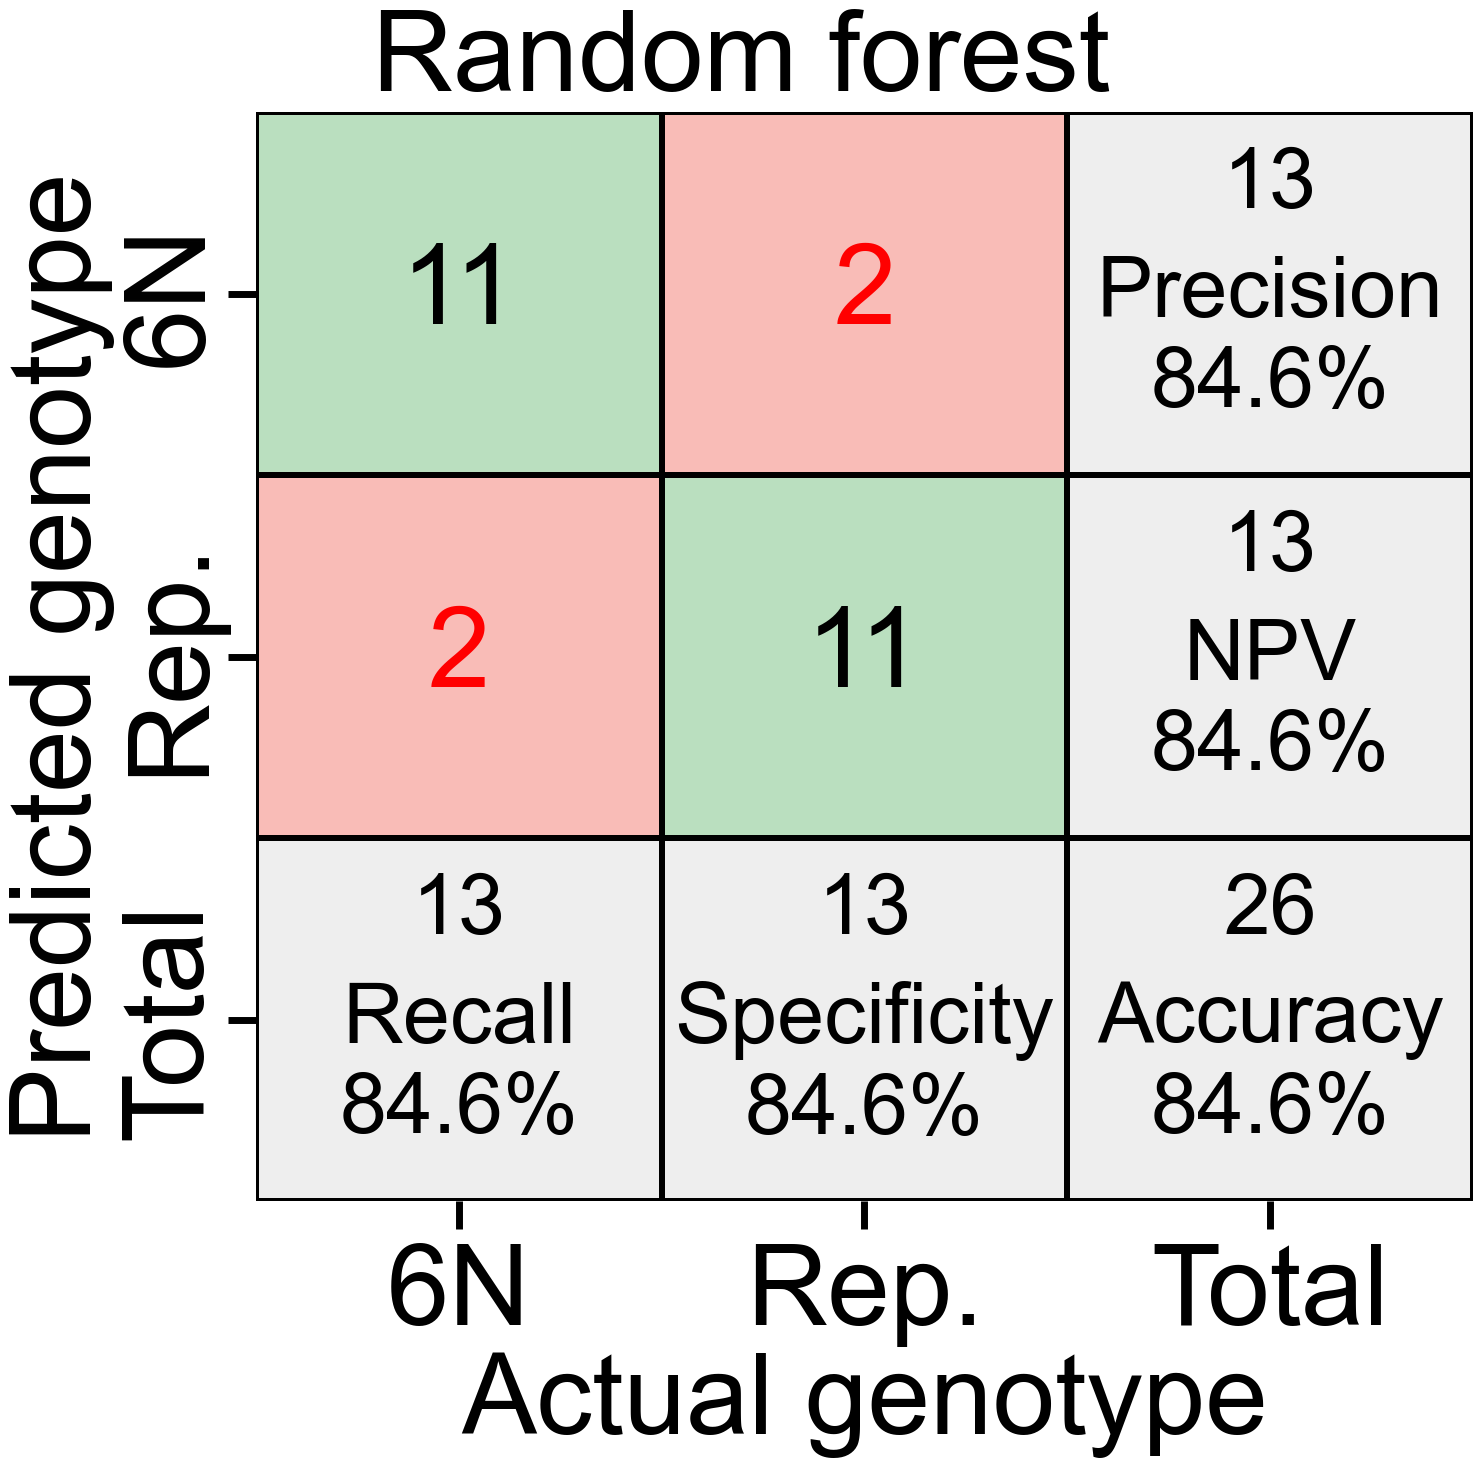

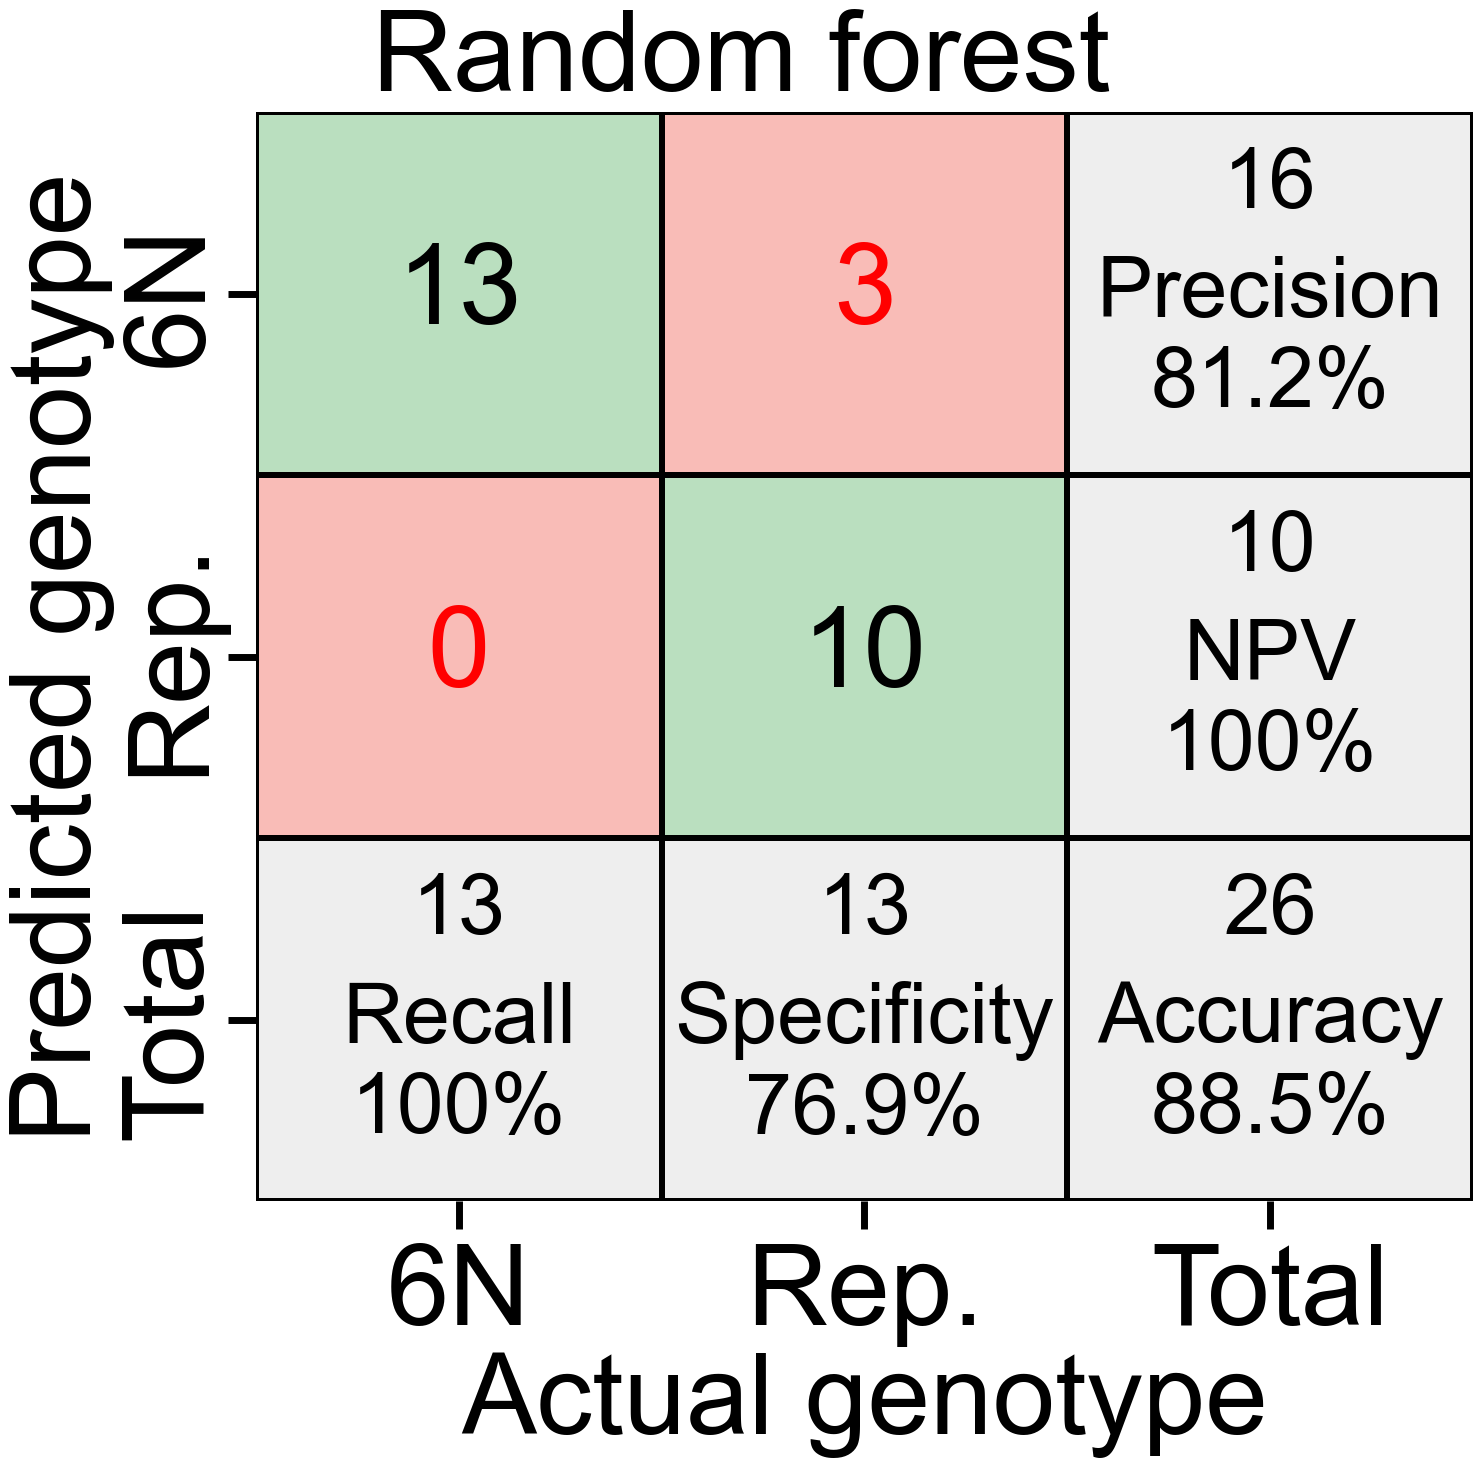

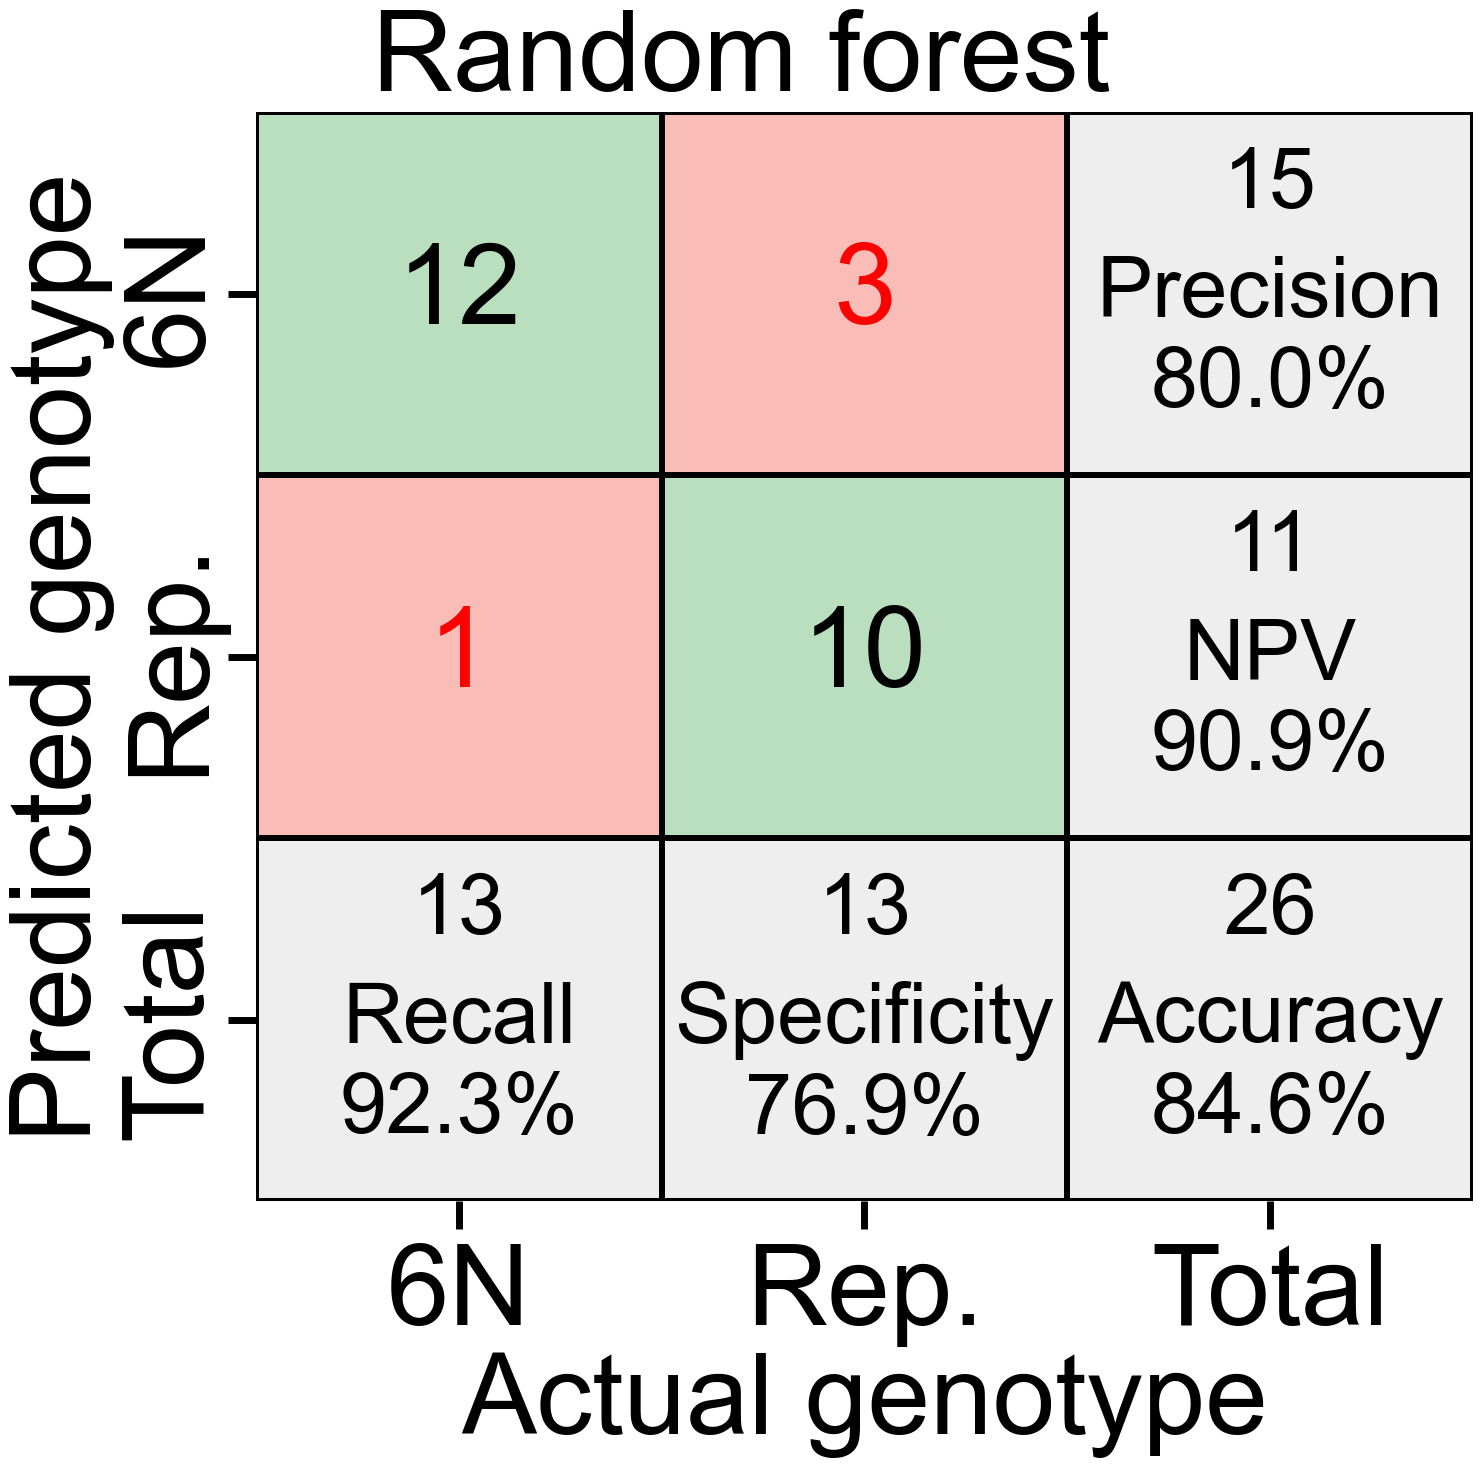

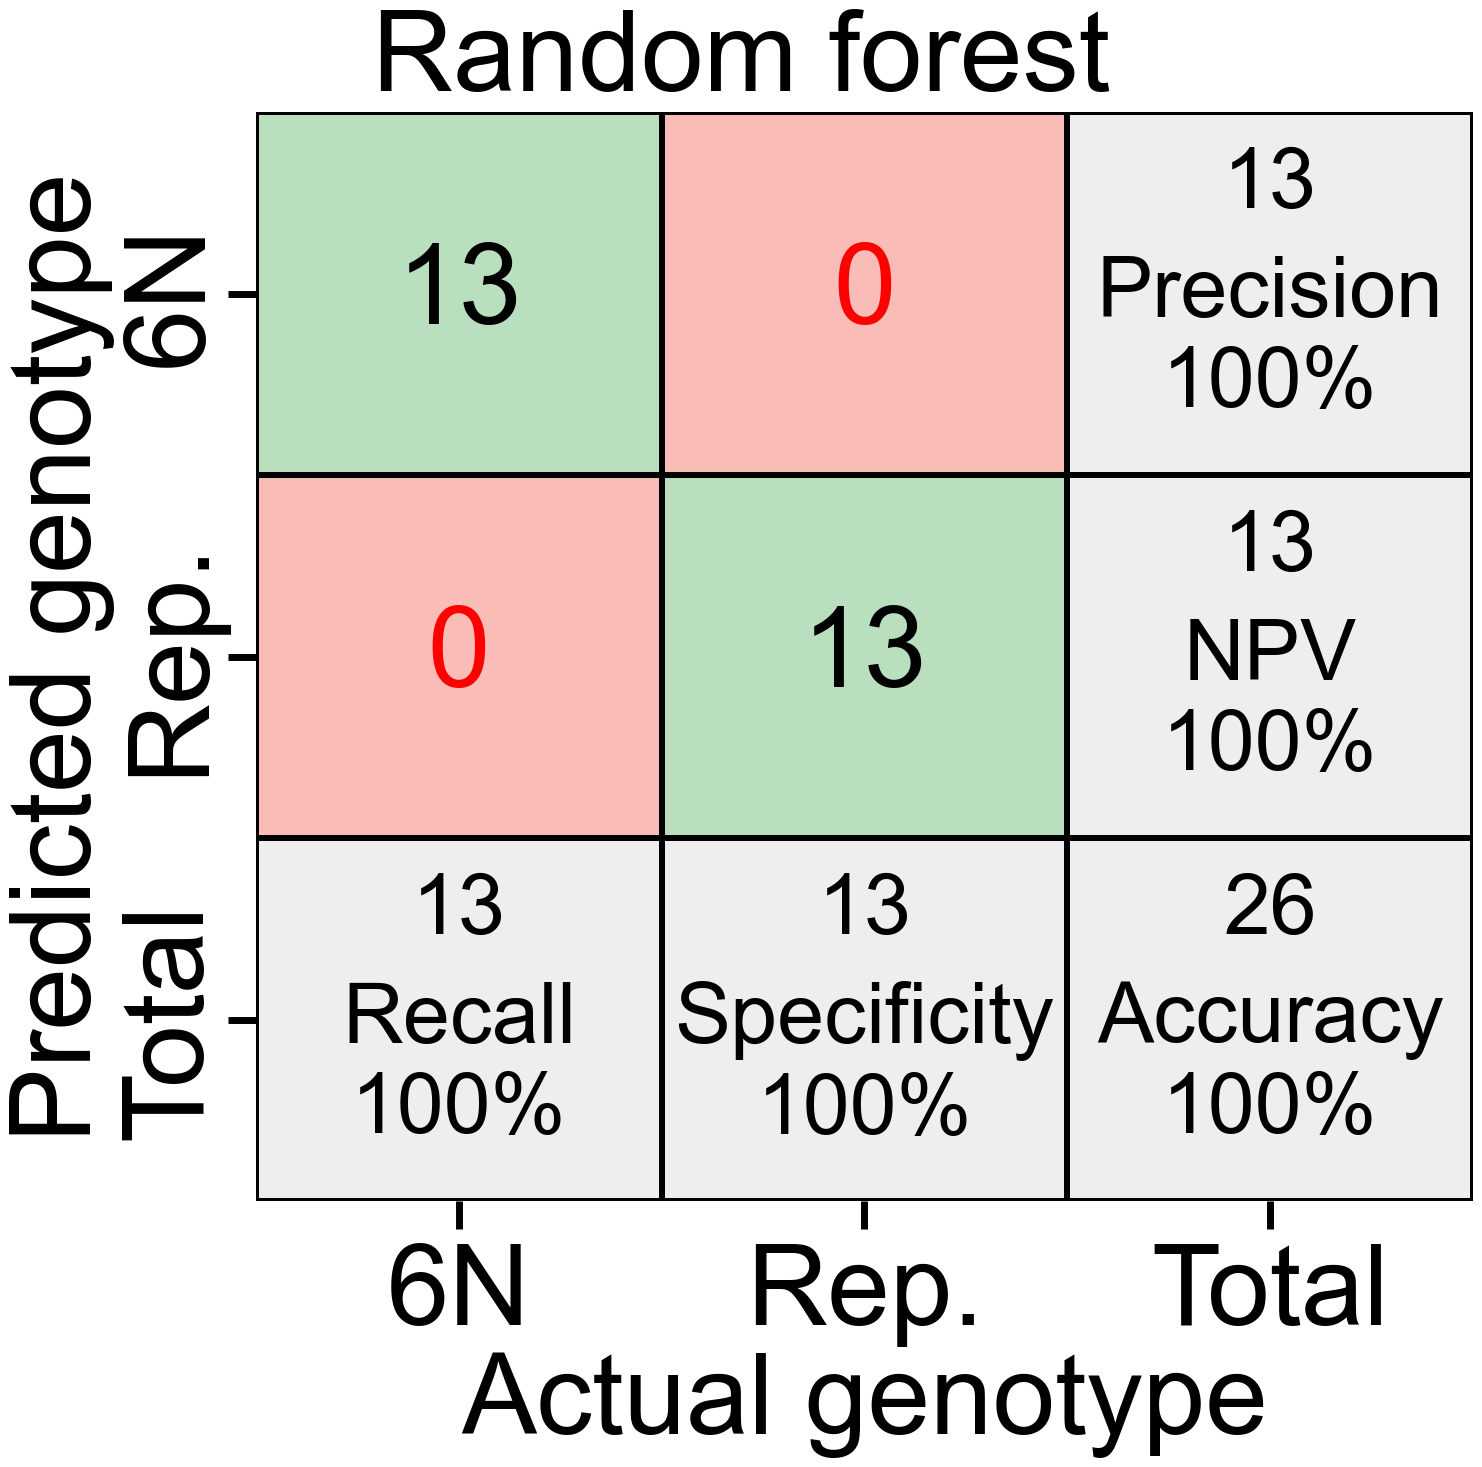

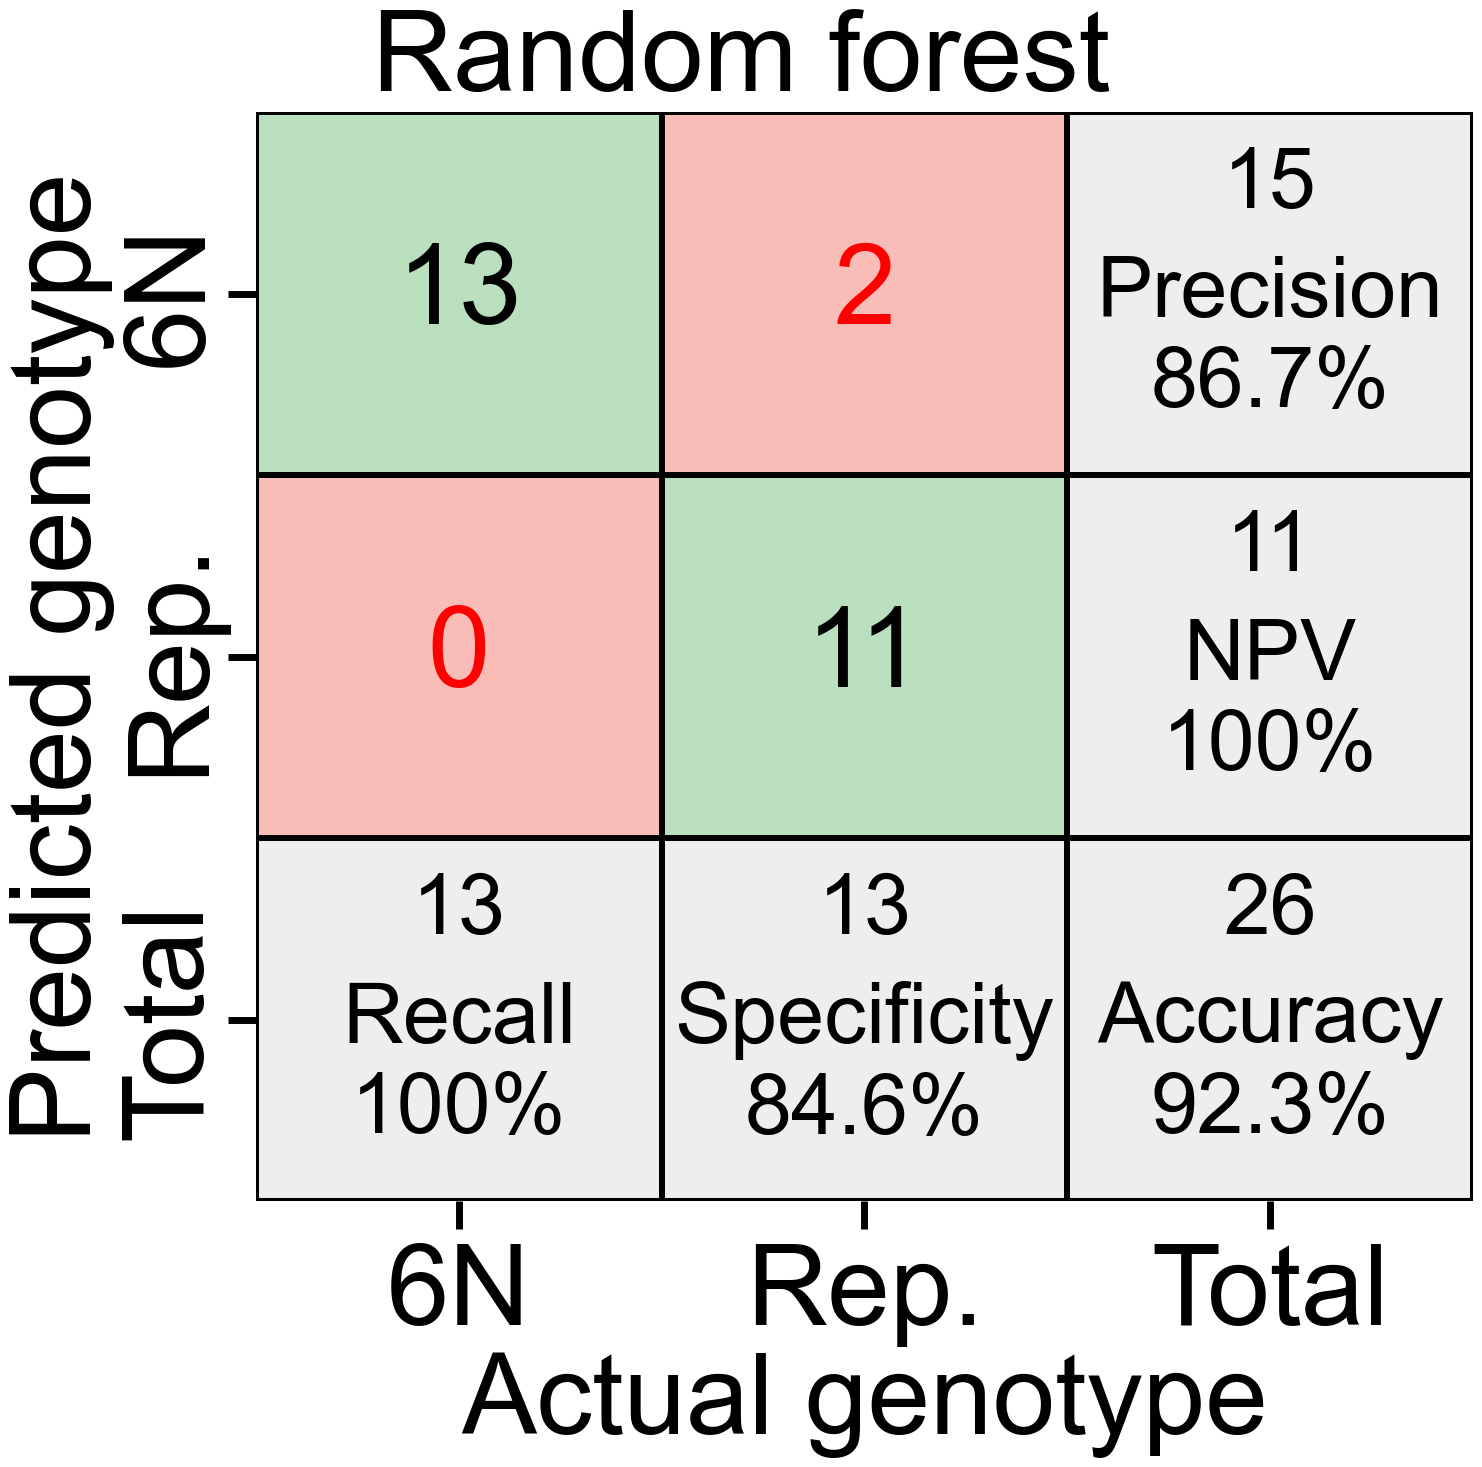

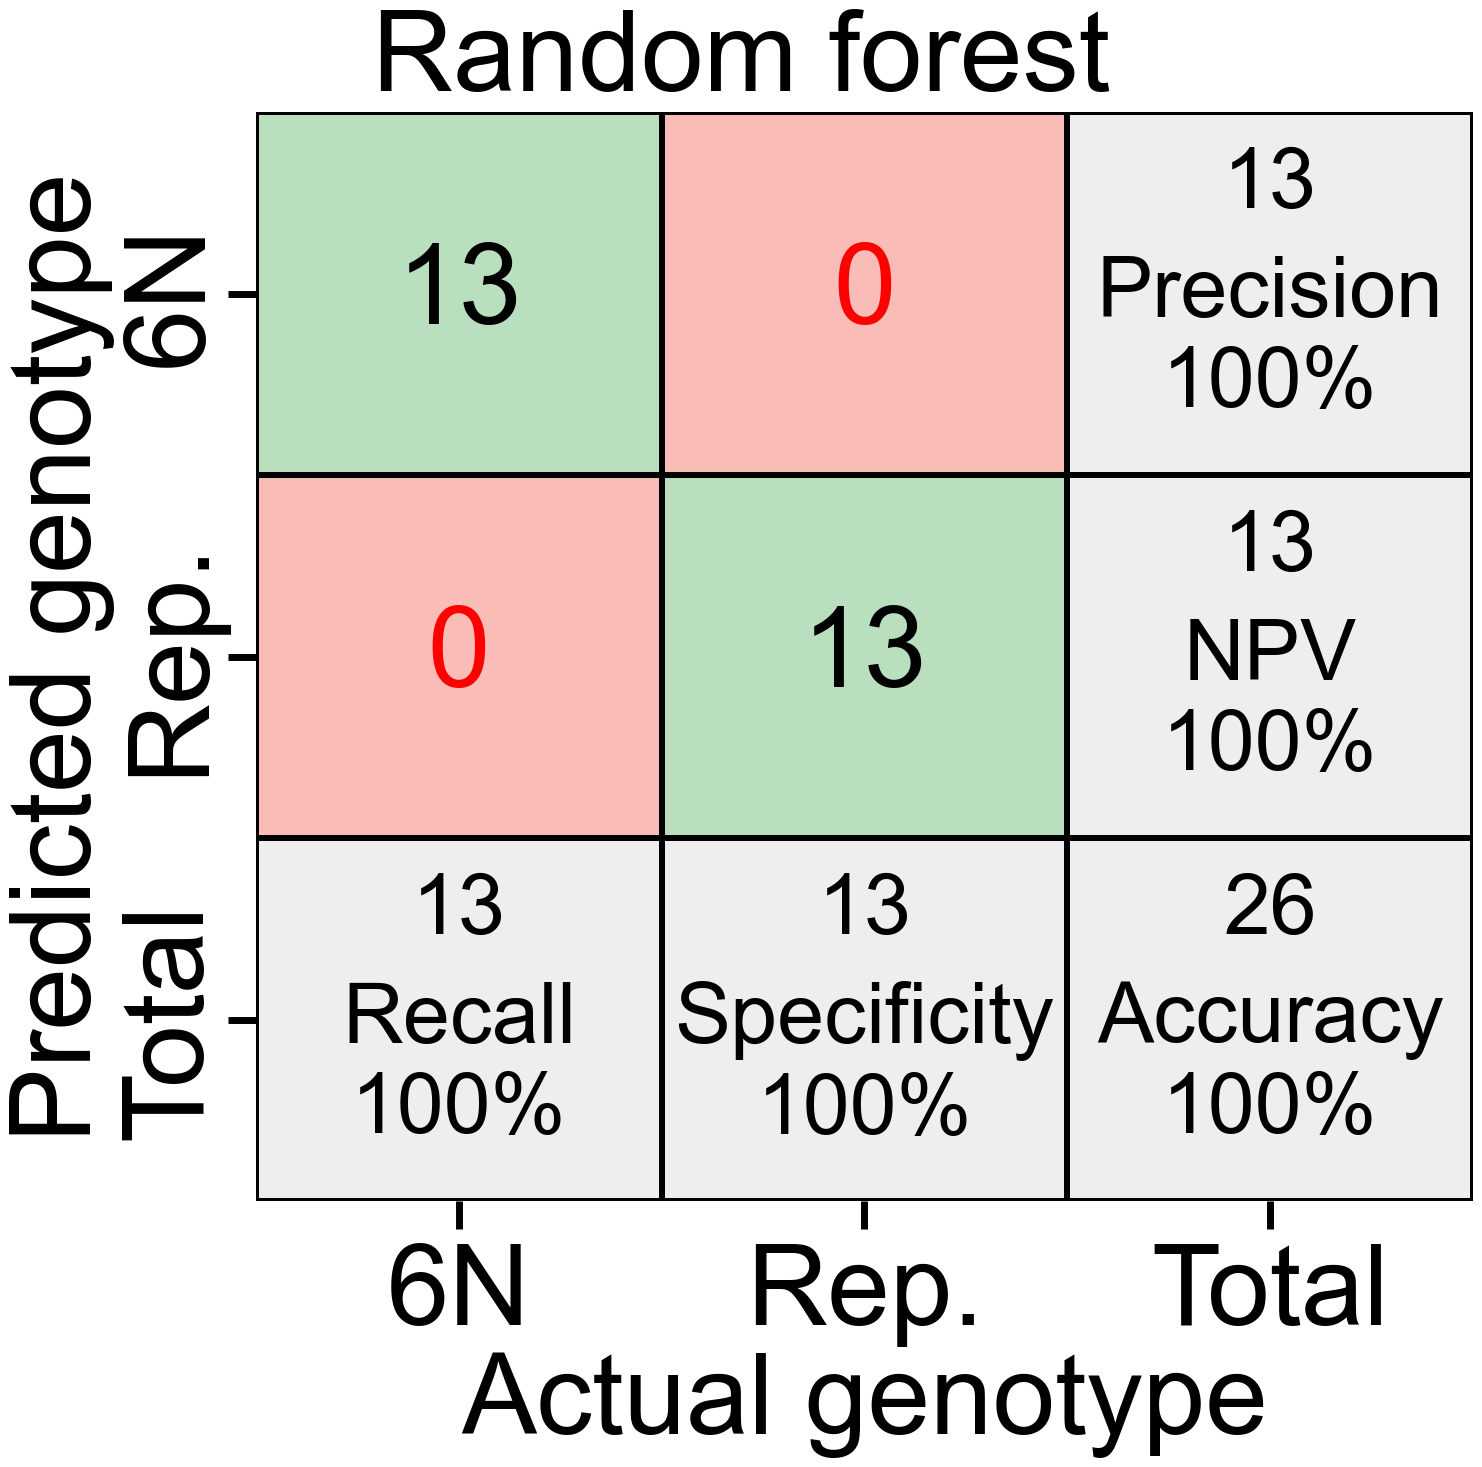

In [22]:
df = pd.read_csv(os.path.join(resultFolder,'forest_kFoldCrossValidation_AnovaFS10percentGlobaltestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = ft.makeConfMatrix(y_test,y_predict,'Random forest',fontSize=fontSize)
fig.savefig('./Panels/cm_rf_global.pdf',dpi=1200)

df = pd.read_csv(os.path.join(resultFolder,'SVC_kFoldCrossValidation_AnovaFS10percent_GlobaltestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = ft.makeConfMatrix(y_test,y_predict,'SVM',fontSize=fontSize)
fig.savefig('./Panels/cm_svc_global.pdf',dpi=1200)

df = pd.read_csv(os.path.join(resultFolder,'XGBOOST_kFoldCrossValidation_AnovaFS10percent_GlobaltestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = ft.makeConfMatrix(y_test,y_predict,'XGBOOST',fontSize=fontSize)
fig.savefig('./Panels/cm_xgb_global.pdf',dpi=1200)


df = pd.read_csv(os.path.join(resultFolder,'ROCKET_kFoldCrossValidation_AnovaFS10percent_GlobaltestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = ft.makeConfMatrix(y_test,y_predict,'ROCKET',fontSize=fontSize)
fig.savefig('./Panels/cm_rocket_global.pdf',dpi=1200)



df = pd.read_csv(os.path.join(resultFolder,'MLP_kFoldCrossValidation_AnovaFS10percent_GlobaltestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = ft.makeConfMatrix(y_test,y_predict,'MLP',fontSize=fontSize)
fig.savefig('./Panels/cm_mlp_global.pdf',dpi=1200)


# #Hc takes 10 minutes to run.
df = pd.read_csv(os.path.join(resultFolder,'hivecote_kFoldCrossValidation_AnovaFS10percent_GlobaltestResults.csv'),index_col=0)
y_test = df['y_test']
y_predict = df['y_predict']
fig = ft.makeConfMatrix(y_test,y_predict,'HiveCote v2.0',fontSize=fontSize)
fig.savefig('./Panels/cm_hc_global.pdf',dpi=1200)
